## mnist 커스텀 데이터셋 구축

In [77]:
from torch.utils.data import Dataset, DataLoader
from torchvision import datasets, transforms
import torch

transform = transforms.Compose([
    transforms.ToTensor(), # [0, 255] -> 0에서 1값으로 정규화
    transforms.Normalize((0.5, ), (0.5, )) # 0에서 1값으로 정규화
])

class MNISTDataset(Dataset):
    def __init__(self, root, train=True, transform=None, download=False):
        self.data = datasets.MNIST(root, train=train, transform=transform, download=download)

    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, index):
        sample, _ = self.data[index]
        
        return sample
    

mnist_dataset = MNISTDataset("./mnist", train=True, transform=transform, download=False)
print(f"dataset_length: {len(mnist_dataset)}")


dataset_length: 60000


### post process 선언 및 커스텀 데이터셋 테스트

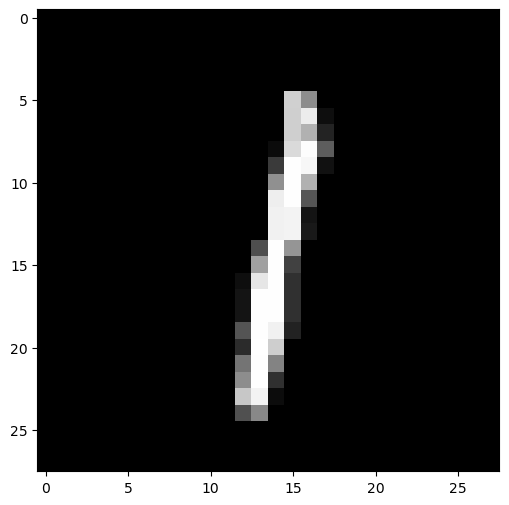

max: 255, min: 0


In [78]:
import matplotlib.pyplot as plt
import random

def denorm(tensor, mean=0.5, std=0.5):
    mean = torch.tensor(mean).view(-1, 1, 1)
    std = torch.tensor(std).view(-1, 1, 1)
    
    tensor = (tensor * std + mean) * 255
    tensor = tensor.round().clamp(0, 255).byte() # round(): 반올림 처리
    
    return tensor

sample_idx = random.randrange(0, len(mnist_dataset))
sample = mnist_dataset[sample_idx]
sample_img = denorm(sample).squeeze().numpy()

plt.figure(figsize=(6, 6))
plt.imshow(sample_img, cmap='gray')
plt.show()
print(f"max: {sample_img.max()}, min: {sample_img.min()}")

In [79]:
from torch.utils.data import DataLoader

train_loader = DataLoader(
    dataset = mnist_dataset,
    batch_size = 64,
    shuffle = True
)

for batch_idx, images in enumerate(train_loader):
    print(f"배치 인덱스: {batch_idx}")
    print(f"이미지 크기: {images.shape}")
    break

배치 인덱스: 0
이미지 크기: torch.Size([64, 1, 28, 28])
